<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.304 · Inteligencia Artificial Avanzada</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## PAC 1: Sistemas recomendadores y algoritmos de agrupamiento

### Presentación

En este CAE aprenderá sobre sistemas de recomendación y técnicas de agrupación de datos (clustering).

### Habilidades

En este trabajo se abordan las siguientes competencias generales desarrolladas en el Máster:
* Capacidad para proyectar, visualizar y diseñar productos, procesos y
Instalaciones en todos los ámbitos de la ingeniería informática.
* Habilidades en modelización matemática, cálculo y simulación en
centros tecnológicos e ingeniería empresarial, especialmente en investigación,
Tareas de desarrollo e innovación en todos los ámbitos relacionados con la informática.
ingeniería.
* Capacidad para aplicar los conocimientos adquiridos y resolver problemas en temas nuevos o
entornos desconocidos dentro de contextos más amplios y multidisciplinarios,
y ser capaz de integrar estos conocimientos.
* Habilidades para el aprendizaje continuo, autodirigido y autónomo.
* Capacidad para modelar, diseñar, definir arquitectura, implementar, gestionar,
operar, gestionar y mantener aplicaciones, redes, sistemas,
servicios y contenidos informáticos.

Las habilidades específicas de esta asignatura que se abordan en esta prueba son:
* Comprender qué es el aprendizaje automático en el contexto de lo artificial.
inteligencia.
* Distinguir entre diferentes tipos y métodos de aprendizaje.
* Aplicar las técnicas estudiadas a un caso real.

### Objetivos

En este CAE aprenderá cómo explorar un nuevo conjunto de datos, cómo funcionan los sistemas de recomendación y cómo utilizar algoritmos de agrupación. Trabajará con funciones de similitud y utilizará la conocida biblioteca _Surprise_ para desarrollar sistemas de recomendación.

### Recursos

Esta PEC requiere los siguientes recursos:

Archivos proporcionados:

* Este archivo .ipynb que tendrás que rellenar con tus respuestas.
* Los archivos movies.csv y ratings.csv, que contienen los datos necesarios. https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset/data

Materiales complementarios:

* Materiales del curso, documentación de la biblioteca (_NumPy_, _pandas_, _seaborn_, _surprise_,...).

###Criterios de presentación y evaluación

La PEC deberá presentarse antes del **9 de abril a las 23:59h**.

El envío final debe ser una versión editada de este cuaderno (.ipynb). Se recomienda el uso de la plataforma Google Colab (https://colab.research.google.com/). Las soluciones del código fuente de los ejercicios deben **implementarse y ejecutarse** en las celdas de código correspondientes y la discusión relacionada y las respuestas justificadas deben agregarse a la celda de texto correspondiente.

Todas las respuestas deben ser discutidas y justificadas. **Respuestas sin
La discusión no será evaluada**.

Los ejercicios se evaluarán considerando tanto la corrección técnica de la solución como la justificación y argumentación del procedimiento y de los resultados.

### Descripción

En esta tarea, estudiará conceptos relacionados con el desarrollo de sistemas de recomendación y el uso de técnicas de agrupación. En los ejercicios propuestos utilizará una base de datos que utiliza el conjunto de datos MovieLens, un conjunto de datos ampliamente utilizado en el campo de los sistemas de recomendación. El conjunto de datos (ml-latest-small) describe la actividad de calificación de 5 estrellas y etiquetado de texto libre de MovieLens, un servicio de recomendación de películas. Contiene 100836 clasificaciones y 3683 aplicaciones de etiquetas en 9742 películas.

Puede encontrar información detallada en https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html


#### El entorno de programación

En esta tarea tendrás que programar en Python y utilizar bibliotecas populares como _Pandas_, _NumPy_ o _seaborn_. Encontrarás estas bibliotecas instaladas en tu entorno de Google Colab.

También utilizará la biblioteca de recomendación _Surprise_ http://surpriselib.com/, que no está incluida en el entorno de Google Colab pero se puede instalar fácilmente como se describe a continuación.



## EJERCIO 1 (3 puntos): Exploración del conjunto de datos

**a) (0,5 puntos)** Leer los archivos de datos y almacenarlos en un _Pandas_ _Dataframe_ y proporcionar una descripción de sus principales características

In [1]:
from google.colab import drive
# Montamos la unidad de Google Drive que alberga nuestros conjuntos de datos.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Definimos las rutas a los archivos CSV.
ratings_path = '/content/drive/My Drive/ratings.csv'
movies_path = '/content/drive/My Drive/movies.csv'

# Cargamos los datos desde los archivos CSV a DataFrames de Pandas.

# Leemos el archivo de calificaciones.
ratings_df = pd.read_csv(ratings_path)
# Leemos el archivo de películas.
movies_df = pd.read_csv(movies_path)

# Proporcionamos una descripción general de los datos.

# Realizamos una descripción de las calificaciones.
ratings_description = ratings_df.describe()
# Realizamos una descripción de las películas.
movies_description = movies_df.describe()

# Imprimimos las descripciones y las primeras filas de cada DataFrame para la inspección de los datos.
print("Descripción del DataFrame de las calificaciones:")
print(ratings_description)
print("\nDescripción del DataFrame de películas:")
print(movies_description)

print("\nPrimeras filas del DataFrame de las calificaciones:")
print(ratings_df.head())
print("\nPrimeras filas del DataFrame de las películas:")
print(movies_df.head())


Descripción del DataFrame de las calificaciones:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09

Descripción del DataFrame de películas:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

Primeras filas del DataFrame de las calificaciones:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1      

# Comentario de los resultados obtenidos

__En este apartado a, damos un vistazo a los datos de calificaciones y películas para entender mejor qué tenemos entre manos. Vemos las estadísticas básicas que nos mostrarán desde el rango de calificaciones dadas hasta el volumen total de datos. Este análisis nos ayudará a identificar si hay valores extraños que no cuadren. Además, al revisar las primeras líneas de los datos, confirmamos que se cargaron bien y nos familiarizamos con la estructura: cómo se llaman las columnas y qué tipo de información guardan.__


**b) (1,5 puntos)** Una vez cargado el conjunto de datos, hagamos un análisis exploratorio.

Complete la siguiente celda para guardar la información solicitada en cada variable correspondiente (los tipos de datos deben coincidir con el código proporcionado):

- ¿Cuántas películas hay?
- ¿Cuántos usuarios hay?
- ¿Cuáles son las calificaciones medias más altas y más bajas? Reportar una película de cada caso.
- ¿Qué película tiene mayor número de ratings?

Utilice las funciones de pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) para obtener las calificaciones promedio, [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) para eliminar columnas innecesarias, [.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) para buscar filas/índice por condición y [.iloc](
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) para acceder a una fila/índice específico.



In [3]:
# Eliminamos la columna 'timestamp' de ratings_df ya que no se utiliza.
# Se crea un nuevo DataFrame ratings_df_cleaned que contiene todas las columnas originales excepto timestamp.
ratings_df_cleaned = ratings_df.drop(columns=['timestamp'])

# Calculamos la calificación promedio para cada película.
# El resultado se almacena en mean_ratings, con movieId como índice y la calificación promedio renombrada a mean_rating.
mean_ratings = ratings_df_cleaned.groupby('movieId')['rating'].mean().rename('mean_rating')

# Unimos las calificaciones promedio con los detalles de las películas.
# Obtenemos un nuevo DataFrame movies_with_mean_ratings que contiene los detalles de las películas junto con sus calificaciones promedio.
movies_with_mean_ratings = movies_df.set_index('movieId').join(mean_ratings)

# Identificamos la película con la calificación promedio más alta.
# Utilizamos .idxmax() y .idxmin() para encontrar los índices (es decir, movieId) de estas películas en movies_with_mean_ratings y luego acceder a sus títulos.
highest_rated_movie = movies_with_mean_ratings.loc[movies_with_mean_ratings['mean_rating'].idxmax(), 'title']

# Identificamos la película con la calificación promedio más baja del mismo modo que highest_rated_movie pero utilizando .idxmin().
lowest_rated_movie = movies_with_mean_ratings.loc[movies_with_mean_ratings['mean_rating'].idxmin(), 'title']

# Calculamos el número de calificaciones por película.
# Calculamos el número total de calificaciones recibidas por cada película, agrupando nuevamente por movieId y utilizando size() para contar las calificaciones.
# En ratings_count tenemos cada movieId asociado con su respectiva número total de las calificaciones.
ratings_count = ratings_df.groupby('movieId').size()

# Identificamos la película con el mayor número de calificaciones.
# Encontramos la película que ha recibido el mayor número de calificaciones utilizando .idxmax() sobre ratings_count para obtener el movieId correspondiente, y luego acceder al título de esa película en movies_df.
most_rated_movie_id = ratings_count.idxmax()
most_rated_movie_title = movies_df.loc[movies_df['movieId'] == most_rated_movie_id, 'title'].iloc[0]

# Finalmente, presentamos los resultados.
print(f"Número total de películas: {movies_df['movieId'].nunique()}")
print(f"Número total de usuarios: {ratings_df['userId'].nunique()}")
print(f"Película con la calificación media más alta: {highest_rated_movie}")
print(f"Película con la calificación media más baja: {lowest_rated_movie}")
print(f"Película con el mayor número de calificaciones: {most_rated_movie_title}")


Número total de películas: 9742
Número total de usuarios: 610
Película con la calificación media más alta: Lamerica (1994)
Película con la calificación media más baja: Gypsy (1962)
Película con el mayor número de calificaciones: Forrest Gump (1994)


# Comentario de los resultados obtenidos

__Este apartado b nos da pistas importantes sobre nuestros datos, mostrándonos tanto las películas que recibieron mejores como peores calificaciones en promedio, y también cuál ha despertado más interés entre los usuarios. Esta información es clave para comprender las tendencias en las preferencias del público y la popularidad de determinadas películas. Al obviar la columna de 'timestamp', hacemos el conjunto de datos más manejable permitiéndonos centrarnos exclusivamente en las calificaciones y en cuán solicitadas son las películas.__

**c) (puntuación de 0,5)** Crea un gráfico de histograma con la distribución de las calificaciones promedio de las películas. Utilice seaborn.histplot y configure el parámetro *bins* para crear el gráfico. Indique con líneas verticales la media y la media $\pm$ std.

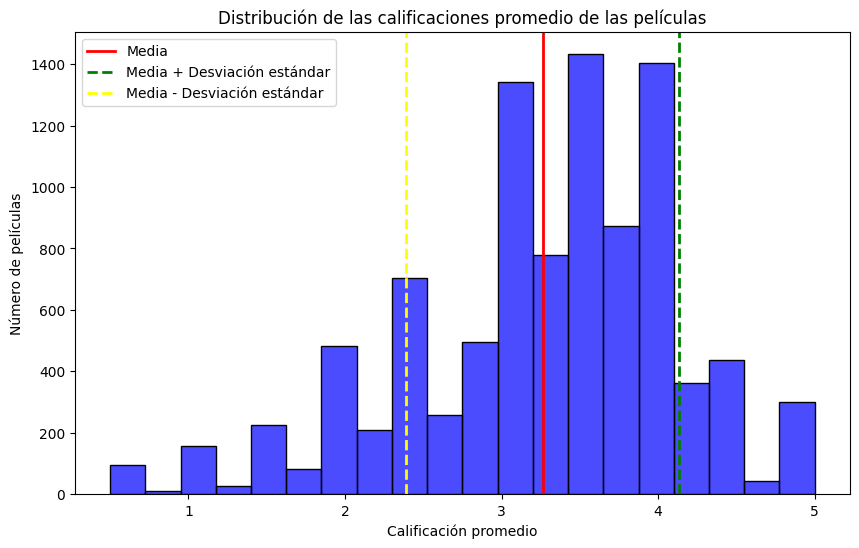

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la calificación promedio por película.

# Esto nos da una serie donde el índice es movieId y el valor es la calificación promedio.
# Las calificaciones se agrupan por movieId, y se calcula la media de rating para cada grupo.
# Obteniendo ratings_mean donde el índice es movieId y los valores son las calificaciones promedio.
ratings_mean = ratings_df.groupby('movieId')['rating'].mean()

# Calculamos las estadísticas claves: media y desviación estándar de las calificaciones promedio.
# Trabajamos con dos estadísticas descriptivas para las calificaciones promedio de las películas: la media (mean_rating) y la desviación estándar (std_rating).
# Estos valores se utilizan para entender la distribución general y la variabilidad de las calificaciones promedio.
mean_rating = ratings_mean.mean()
std_rating = ratings_mean.std()

# Configuramos el gráfico de histograma.
# Establecemos las dimensiones del gráfico.
plt.figure(figsize=(10, 6))

# Creamos el histograma de las calificaciones promedio usando Seaborn.
# 'bins' definimos cuántos contenedores utilizar, 'kde' es la estimación de densidad del kernel.
#  Especificamos 20 contenedores (bins), se desactiva la estimación de densidad del kernel (kde=False), y se elige un color azul con cierta transparencia (alpha=0.7).
sns.histplot(ratings_mean, bins=20, kde=False, color='blue', alpha=0.7)

# Añadimos un título y las etiquetas del gráfico.
#  Esto ayuda a visualizar la posición de la media y cómo la desviación estándar se extiende a partir de ella.
plt.title('Distribución de las calificaciones promedio de las películas')
plt.xlabel('Calificación promedio')
plt.ylabel('Número de películas')

# Añadimos líneas verticales para la media y la media ± desviación estándar.
# Configuramos el título del gráfico, las etiquetas de los ejes y se muestra la leyenda.
# Esto nos permite visualizar la dispersión de las calificaciones alrededor de la media.
plt.axvline(mean_rating, color='red', linestyle='-', linewidth=2, label='Media')
plt.axvline(mean_rating + std_rating, color='green', linestyle='--', linewidth=2, label='Media + Desviación estándar')
plt.axvline(mean_rating - std_rating, color='yellow', linestyle='--', linewidth=2, label='Media - Desviación estándar')

# Finalmente mostramos leyenda y el gráfico de histograma
plt.legend()
plt.show()

# Comentario de los resultados obtenidos

__El histograma de este apartado c, nos da una imagen de la distribución de las calificaciones promedio a través del conjunto de películas, ofreciéndonos una perspectiva sobre la tendencia general de cómo el público califica las películas. Las líneas verticales marcan la media y nos muestran cómo se agrupan las calificaciones a su alrededor, revelando si la mayoría de las películas tienden a tener altas calificaciones promedio, bajas, o si existe una gran variabilidad entre ellas. Esta gráfica sirve para detectar un posible sesgo en las calificaciones, como por ejemplo, si hay una tendencia hacia calificaciones promedio más altas o más bajas, y sirve como punto de partida para explorar en mayor profundidad los elementos que puedan afectar las calificaciones de las películas.__

**d) (puntuación de 0,5)** Cree un diagrama de barras con las 10 películas más recomendadas calificadas por al menos 5 usuarios

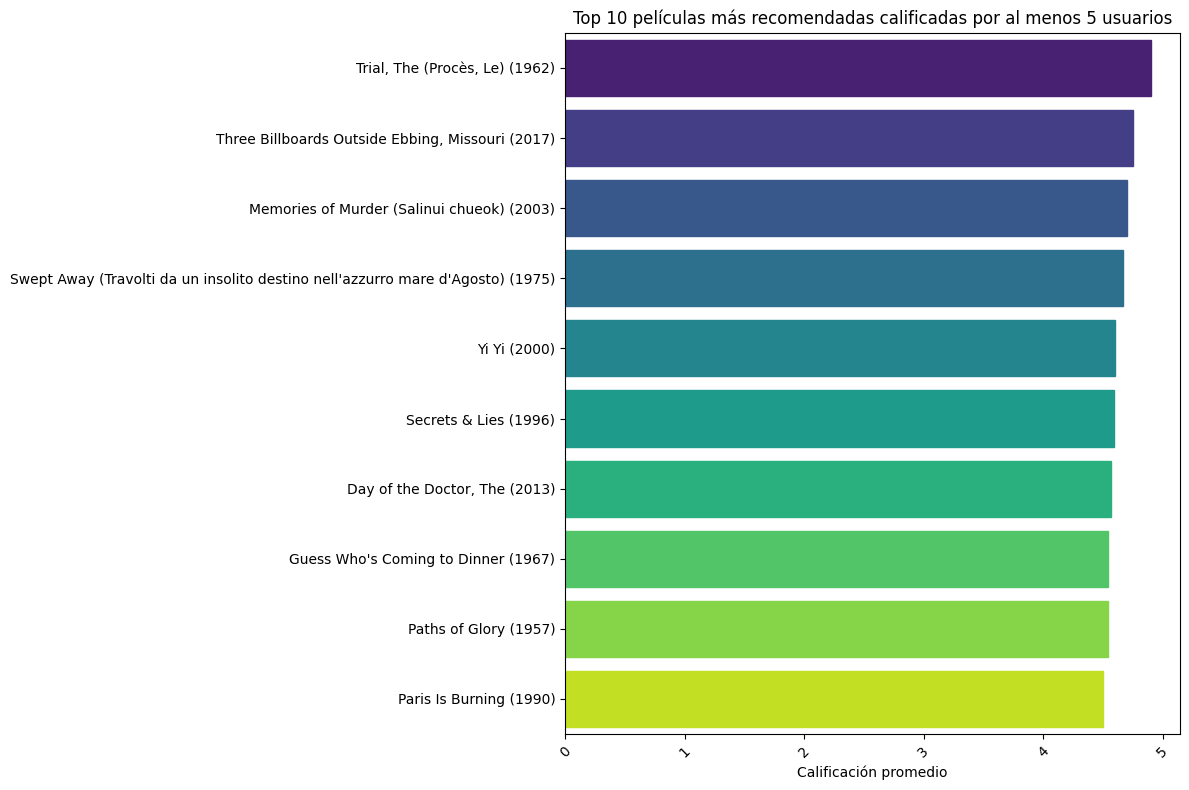

In [5]:
import seaborn as sns

# Filtramos las películas basándonos en el número mínimo de calificaciones.

# Establecemos un umbral de 5 calificaciones como mínimo para considerar una película en el análisis.
min_ratings = 5
# Agrupamos las calificaciones por movieId y contamos el número de calificaciones para cada película.
movie_rating_counts = ratings_df.groupby('movieId').size()
# Filtramos aquellas películas que tienen 5 o más calificaciones, identificando sus movieId correspondientes.
movies_with_enough_ratings = movie_rating_counts[movie_rating_counts >= min_ratings].index

# Filtramos por las calificaciones para incluir solo aquellas pertenecientes a películas que cumplen con el criterio de calificaciones mínimas establecido previamente.
filtered_ratings = ratings_df[ratings_df['movieId'].isin(movies_with_enough_ratings)]

# Calculamos la calificación promedio para las películas filtradas.
# Para las películas filtradas, se calcula la calificación promedio, agrupando por movieId.
mean_ratings = filtered_ratings.groupby('movieId')['rating'].mean()

# Identificamos las 10 películas con las calificaciones promedio más altas.
top_10_movies = mean_ratings.nlargest(10)

# Extraemos los títulos de las 10 películas seleccionadas.
# Establecemos movieId como índice en movies_df y localizamos los títulos de las 10 películas seleccionadas usando sus movieId.
top_10_movies_titles = movies_df.set_index('movieId').loc[top_10_movies.index, 'title']

# Creamos el diagrama de barras.

# Se configura el tamaño de la figura y se crea un diagrama de barras utilizando sns.barplot.
# Cada barra representa una de las 10 películas seleccionadas, con la calificación promedio en el eje X y los títulos de las películas en el eje Y.
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_10_movies.values, y=top_10_movies_titles, color='lightblue')

# Aplicamos manualmente los colores de la paleta a cada barra.
# Generamos una paleta de colores "viridis" y aplicamos manualmente a cada barra del gráfico para personalizar su apariencia.
palette = sns.color_palette("viridis", n_colors=len(top_10_movies))
for bar, color in zip(barplot.patches, palette):
    bar.set_color(color)

# Se añaden un título al gráfico y etiquetas para el eje X.
plt.title('Top 10 películas más recomendadas calificadas por al menos 5 usuarios')
plt.xlabel('Calificación promedio')
# Se oculta la etiqueta del eje Y ya que los títulos de las películas son autoexplicativos.
plt.ylabel('')
# Los nombres de las películas en el eje Y se rotan 45 grados para mejorar la legibilidad.
plt.xticks(rotation=45)
# Con plt.tight_layout() ajustamos automáticamente los parámetros para que el gráfico se ajuste bien.
plt.tight_layout()
plt.show()

# Comentario de los resultados obtenidos

__Este diagrama de barras del apartado d, se centra en las 10 películas más recomendadas, basándose en su calificación promedia, siempre y cuando hayan obtenido al menos 5 calificaciones de usuarios. Destacamos también que al aplicar una paleta de colores elegida específicamente para esto y visualizar las calificaciones promedio, se facilita mucho la tarea de detectar cuáles son las películas más apreciadas dentro del conjunto de datos analizado. Esto resalta de forma efectiva las preferencias.__

## EXERCICIO 2 (3.5 PUNTOS): Recomendadores con la librería surprise

En este ejercicio trabajaremos con la biblioteca _Surprise_. _Surprise_ no está instalado en su entorno de Google Colab. Para poder instalarlo debes ejecutar la siguiente celda

In [6]:
!pip install surprise

**a) (1 punto)**
Utilice _Surprise_ y el 80% de los datos para entrenar los siguientes algoritmos (parámetros predeterminados) para predecir las calificaciones de los usuarios:

* KNNBasic (_surprise.KNNBasic_)
* KNNBaseline (_surprise.KNNBaseline_)
* KNNWithMeans (_surprise.KNNWithMeans_)
* Predictor normal (_surprise.Predictor normal_)

Utilizando la métrica del error cuadrático medio, ¿cuál es el rendimiento de cada algoritmo en el 20% restante de los datos (conjunto de prueba)?

In [7]:
# Para este apartado a del ejercicio segundo utilizamos la biblioteca Surprise
# para cargar un conjunto de datos de calificaciones de películas, dividirlo en subconjuntos de entrenamiento y prueba.
# y, finalmente, evaluar el rendimiento de algunos algoritmos de filtrado colaborativo en términos de error cuadrático medio (RMSE).

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic, KNNBaseline, KNNWithMeans, NormalPredictor
from surprise import accuracy

# Configuración inicial para cargar el conjunto de datos.
# Creamos el Reader, especificando el rango de las calificaciones, en este caso de 0.5 a 5:
# necesario para interpretar correctamente los datos de las calificaciones.

reader = Reader(rating_scale=(0.5, 5))

# Cargamo los datos de calificaciones desde el DataFrame.
# Cargamos el conjunto de datos desde un DataFrame llamado ratings_df, que debe contener tres columnas: userId, movieId, y rating.
# Utilizamos el Reader previamente definido para asegurar que los datos se interpreten correctamente.
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# División del conjunto de datos: 80% para entrenamiento y 20% para pruebas.
# Dividimos el conjunto de datos en subconjuntos de entrenamiento y prueba, reservando el 20% de los datos para pruebas.
trainset, testset = train_test_split(data, test_size=0.2)

# Definimos un diccionario llamado algorithms que contiene instancias de cuatro algoritmos diferentes
# de filtrado colaborativo seleccionados, bajo mi criterio, para ser evaluados.
# He seleccionado los algoritmos KNNBasic, KNNBaseline y KNNWithMeans porque representan variantes
# del enfoque de vecinos más cercanos (k-NN), cada uno con sus propias optimizaciones y supuestos.
# También he seleccionado NormalPredictor ya que, es un algoritmo que predice calificaciones
# basado en una distribución aleatoria que sigue la distribución general de calificaciones en el conjunto de entrenamiento.
algorithms = {
    'KNNBasic': KNNBasic(),
    'KNNBaseline': KNNBaseline(),
    'KNNWithMeans': KNNWithMeans(),
    'NormalPredictor': NormalPredictor(),
}

# Para cada algoritmo en el diccionario algorithms, realizamos el siguiente proceso:
for name, algorithm in algorithms.items():
    # Imprimimos el nombre del algoritmo que se está evaluando.
    print(f'Evaluando: {name}...')
    # Entrenamos el algoritmo utilizando el subconjunto de entrenamiento previamente definido.
    algorithm.fit(trainset)
    # Predecimos las calificaciones en el subconjunto de prueba.
    predictions = algorithm.test(testset)
    # Calculamos la métrica RMSE (Root Mean Square Error o Raíz del Error Cuadrático Medio)
    # de las predicciones para evaluar la precisión de las predicciones y el rendimiento:
    rmse = accuracy.rmse(predictions, verbose=True)
    # Imprimimos el RMSE obtenido para cada algoritmo, proporcionando una medida cuantitativa de su rendimiento.
    print(f'{name} - Test de RMSE: {rmse}\n')

Evaluando: KNNBasic...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9485
KNNBasic - Test de RMSE: 0.9484881667174961

Evaluando: KNNBaseline...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8753
KNNBaseline - Test de RMSE: 0.8752801080477477

Evaluando: KNNWithMeans...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9006
KNNWithMeans - Test de RMSE: 0.9006442853564856

Evaluando: NormalPredictor...
RMSE: 1.4231
NormalPredictor - Test de RMSE: 1.4230712222719841



# Comentario de los resultados obtenidos
__En este apartado a, evaluamos el rendimiento de diferentes algoritmos de filtrado colaborativo en el conjunto de datos de las calificaciones de películas, para ello, utilizamos el RMSE como métrica. Este proceso permite decidir qué algoritmo es el más conveniente para un sistema de recomendaciones, considerando su efectividad al estimar las calificaciones de películas que los usuarios aún no han visto.__

**b) (0,5 puntos)** Para el modelo con el RMSE más bajo/mejor, informe las calificaciones estimadas y reales para los cinco primeros elementos del conjunto de prueba.

In [8]:
# Añadimos una modificación para almacenar en un diccionario vacío llamado rmse_results
# que contendrá el valor de RMSE de cada algoritmo evaluado.
# La clave será el nombre del algoritmo y el valor será el RMSE correspondiente.
rmse_results = {}

# Modificamos el bucle de evaluación para almacenar los RMSE:
for name, algorithm in algorithms.items():
    #Imprimimos el nombre del algoritmo que se está evaluando.
    print(f'Evaluando {name}:')
    # Entrenamos el algoritmo con el conjunto de entrenamiento trainset.
    algorithm.fit(trainset)
    # Hacemos predicciones sobre el conjunto de prueba testset.
    predictions = algorithm.test(testset)
    # Calculamos el RMSE de las predicciones para evaluar el rendimiento del algoritmo
    # y lo imprimimos.
    rmse = accuracy.rmse(predictions, verbose=True)
    # Finalmente, almacenamos el RMSE en el diccionario rmse_results.
    rmse_results[name] = rmse

# Encontramos el algoritmo con el RMSE más bajo utilizando la función min() aplicada al diccionario rmse_results:
# lo que nos da el mejor rendimiento entre los algoritmos evaluados.
best_algorithm_name = min(rmse_results, key=rmse_results.get)

# Volvemos a entrenar y predecir con el mejor algoritmo.
# Recuperamos el mejor algoritmo basado en su nombre.
# Entrenamos con el conjunto de entrenamiento completo y se hacen predicciones sobre el conjunto de prueba.
# Esto prepara el escenario para una inspección más detallada de las predicciones realizadas por el mejor modelo.
best_algorithm = algorithms[best_algorithm_name]
best_algorithm.fit(trainset)
best_predictions = best_algorithm.test(testset)

# Mostramos las calificaciones estimadas y reales para los primeros cinco elementos del conjunto de prueba.
# Imprimimos el nombre del mejor modelo seguido de un detalle de las calificaciones estimadas
# y reales para los primeros cinco elementos del conjunto de prueba.
# Esto proporciona una visión de cómo el mejor modelo realiza sus predicciones en casos específicos.
print(f"\nModelo con el RMSE más bajo: {best_algorithm_name}")
print("Calificaciones estimadas y reales para los primeros cinco elementos del conjunto de prueba:")
for i in range(5):
    user_id = best_predictions[i].uid
    movie_id = best_predictions[i].iid
    real_rating = best_predictions[i].r_ui
    estimated_rating = best_predictions[i].est
    print(f"Usuario: {user_id}, Película: {movie_id}, Real: {real_rating}, Estimado: {estimated_rating}")

Evaluando KNNBasic:
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9485
Evaluando KNNBaseline:
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8753
Evaluando KNNWithMeans:
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9006
Evaluando NormalPredictor:
RMSE: 1.4164
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.

Modelo con el RMSE más bajo: KNNBaseline
Calificaciones estimadas y reales para los primeros cinco elementos del conjunto de prueba:
Usuario: 249, Película: 858, Real: 4.5, Estimado: 4.593913069754574
Usuario: 57, Película: 377, Real: 2.0, Estimado: 3.2037381773859757
Usuario: 28, Película: 8961, Real: 3.5, Estimado: 3.292298241627955
Usuario: 312, Película: 5991, Real: 4.0, Estimado: 3.8550003682676683
Usuario: 474, Película: 1917, Real: 1.5, Estimado: 2.8416458026967417


# Comentario de los resultados obtenidos

__Este apartado b, evalúa y selecciona el algoritmo más eficiente usando el RMSE como referencia y ofrece una forma clara de entender qué tan bien funcionan diferentes modelos en el sistema de recomendaciones. Al comparar las calificaciones estimadas con las reales, podemos ver directamente la precisión de un modelo al predecir lo que podría interesarle al usuario. Esto es esencial para enriquecer la experiencia de usuario en servicios de recomendación. Optar por el modelo con el menor RMSE indica una preferencia hacia aquel algoritmo que consistentemente presenta la menor diferencia entre lo que predice y las calificaciones que los usuarios realmente dan, señalando así la eficiencia de un sistema de recomendación óptimamente calibrado.__

**c) (1 punto)** Escriba un código para obtener las n predicciones principales de cada usuario del conjunto de datos de prueba, indicando el ítem, la puntuación verdadera y estimada. Tenga en cuenta que la biblioteca Surprise devuelve las predicciones como una lista. Utilice el código para imprimir las principales recomendaciones de un usuario elegido y el título de las películas recomendadas.

In [9]:
from collections import defaultdict

# La función tomará un conjunto de predicciones y un número entero n,
# y devolverá las top n predicciones para cada usuario.
def get_top_n(predictions, n=10):
    '''Devuelve las top n predicciones para cada usuario de un conjunto de predicciones.'''

    # Mapeamos las predicciones para cada usuario.
    # Inicializamos defaultdict para almacenar una lista de tuplas (iid, true_r, est) para cada usuario uid.
    # Cada tupla contiene el ID de la película (iid), la calificación real true_r y la calificación estimada est.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, true_r, est))

    # Para cada usuario, ordenamos las predicciones por la calificación estimada (est)
    # en orden descendente y se manteniendo solo las top n predicciones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[2], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Obtenemos las top n recomendaciones para cada usuario.
# Aplicamos la función get_top_n al conjunto de predicciones best_predictions
# que contiene las predicciones del modelo con el mejor RMSE
# para obtener las top 10 recomendaciones para cada usuario.
top_n_predictions = get_top_n(best_predictions, 10)

# Elegimos un user_id específico simplemente tomando el primer user_id disponible en top_n_predictions.
some_user_id = list(top_n_predictions.keys())[0]
print(f"El user_id que usaremos será: {some_user_id}")

# Del usuario anterior imprimimos sus top n recomendaciones
user_id = some_user_id
print(f"Top {10} recomendaciones para el usuario {user_id}:")

# Verificamos por pantalla si el usuario seleccionado está en top_n_predictions,
# en caso contrario pintamos 'No'.
print(f"Verificando si el usuario {user_id} está en top_n_predictions: {'Yes' if user_id in top_n_predictions else 'No'}")
# Imprimimos por pantalla las predicciones del usuario,
# en caso contrario pintamos 'Ninguna predicción encontrada'.
print(f"Predicciones para el usuario {user_id}: {top_n_predictions.get(user_id, 'Ninguna predicción encontrada')}")

# Para cada una de las top 10 recomendaciones del usuario seleccionado,
# buscamos el título de la película correspondiente al movie_id en movies_df,
# y se imprime junto con la calificación verdadera y la calificación estimada.
for movie_id, true_rating, est_rating in top_n_predictions[user_id]:
    movie_title = movies_df.loc[movies_df['movieId'] == int(movie_id), 'title'].iloc[0]
    print(f"Ítem: {movie_title}, Puntuación Verdadera: {true_rating}, Estimada: {est_rating:.2f}")

El user_id que usaremos será: 249
Top 10 recomendaciones para el usuario 249:
Verificando si el usuario 249 está en top_n_predictions: Yes
Predicciones para el usuario 249: [(858, 4.5, 4.593913069754574), (527, 4.5, 4.583362271702942), (5952, 4.5, 4.465335673679182), (908, 4.0, 4.405010585534597), (142488, 4.5, 4.403667223874799), (1206, 4.0, 4.386591219517266), (79132, 5.0, 4.382460932277684), (904, 3.5, 4.379467664451578), (78499, 4.0, 4.374825883838605), (57669, 4.0, 4.3677015783015225)]
Ítem: Godfather, The (1972), Puntuación Verdadera: 4.5, Estimada: 4.59
Ítem: Schindler's List (1993), Puntuación Verdadera: 4.5, Estimada: 4.58
Ítem: Lord of the Rings: The Two Towers, The (2002), Puntuación Verdadera: 4.5, Estimada: 4.47
Ítem: North by Northwest (1959), Puntuación Verdadera: 4.0, Estimada: 4.41
Ítem: Spotlight (2015), Puntuación Verdadera: 4.5, Estimada: 4.40
Ítem: Clockwork Orange, A (1971), Puntuación Verdadera: 4.0, Estimada: 4.39
Ítem: Inception (2010), Puntuación Verdadera: 5.

# Comentario de los resultados obtenidos

__En este apartado c, mostramos las recomendaciones que el sistema de recomendación produce para un usuario en particular, resaltando tanto las calificaciones reales como las previstas por el modelo. Este proceso no solo facilita la evaluación de qué tan acertadas son las predicciones del modelo en detalle, sino que también proporciona una visión sobre lo que cada usuario prefiere y hasta qué punto el modelo logra cumplir con esas expectativas. Al exponer las mejores recomendaciones, contamos con una base más sólida para hacer ajustes precisos, con el fin de afinar la exactitud y pertinencia de lo que el sistema sugiere.__

**d) (1 punto)** Una de las medidas de desempeño más relevantes en los sistemas de recomendación son la precisión y el recall. Definimos un ítem como relevante cuando la calificación real es superior a un cierto umbral T (3,5 sobre 5, por ejemplo). De manera similar, se recomienda un ítem si la calificación estimada es superior a T. A continuación, definamos las siguientes medidas:
- Verdaderos Positivos (TP): Número de elementos relevantes y recomendados
- Falsos Positivos (FP): Número de ítems recomendados pero no relevantes:
- Falsos negativos (FN): Número de elementos relevantes pero no recomendados

Entonces, podemos definir precisión y recall de la siguiente manera:

**Precisión**: ¿Cuál es la fracción de los elementos recomendados que son relevantes?

Precisión = #artículos relevantes y recomendados / #artículos recomendados = $ \frac{TP}{(TP+FP)}$

**Recall**: ¿Cuál es la fracción de los artículos relevantes que realmente se recomiendan?

Recall = #artículos relevantes y recomendados / #artículos relevantes = $ \frac{TP}{(TP+FN)}$

Normalmente calculamos la precisión y el recall en las k recomendaciones principales para cada usuario (precisión@k y recall@k). Precision@k sería la fracción de recomendaciones relevantes en el top k, y recall@k sería la fracción de recomendaciones relevantes con respecto a los posibles elementos relevantes en el top k recomendaciones.

- Escriba una función para calcular la precisión y recall de las k recomendaciones principales para cada usuario.
- Utilice la función para calcular la precisión y la recall de un usuario en particular y comprobar que los valores devueltos coincidan con un cálculo manual.
- Obtener la precisión@k y la recall@k promedio de todos los usuarios como puntuación de rendimiento.

In [10]:
# La función calculará la precisión y el recall para las top k recomendaciones de cada usuario.
# La precisión mide qué fracción de las recomendaciones son relevantes, mientras que el recall mide qué fracción de los ítems relevantes son recomendados.
# Utilizaremos predictions es una lista de predicciones realizadas por el modelo, k es el número de recomendaciones top a considerar,
# y threshold es el umbral utilizado para decidir si una calificación es relevante.
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Devuelve la precisión y el recall de las k recomendaciones principales para cada usuario.'''

    # Mapeamos las predicciones de cada usuario.
    # Las predicciones se organizan por usuario en un diccionario,
    # donde cada clave es un user_id y cada valor es una lista de tuplas conteniendo la calificación estimada y la calificación real.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    # Calculamos de precisión y recall para cada usuario.
    for uid, user_ratings in user_est_true.items():
        # Para cada usuario, ordenamos sus predicciones por la calificación estimada de manera descendente.
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Contamos el número de ítems relevantes y recomendados entre las top k predicciones.
        n_rel_and_rec_k = sum((true_r >= threshold) and (est >= threshold) for est, true_r in user_ratings[:k])

        # Contamos el número total de recomendaciones relevantes para el usuario.
        n_rel = sum((true_r >= threshold) for _, true_r in user_ratings)

        # Contamos el número de recomendaciones en el top k.
        n_rec_k = sum((est >= threshold) for est, _ in user_ratings[:k])

        # Calculamos la precisión y el recall para el usuario.
        # Si no hay recomendaciones en el top k, la precisión se establece en 1 por definición.
        # Si no hay ítems relevantes, el recall se establece en 1.
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

# Sabemos que best_predictions contiene las mejores predicciones para los usuarios.
precisions, recalls = precision_recall_at_k(best_predictions, k=5, threshold=3.5)

# Calculamos la precisión y el recall promedio de todos los usuarios.
# De este modo: la precisión y el recall promedio agregando los valores para cada usuario y dividiendo por el número total de usuarios.
precision_avg = sum(prec for prec in precisions.values()) / len(precisions)
recall_avg = sum(rec for rec in recalls.values()) / len(recalls)

# Visualizamos de los resultados.
# Imprimimos la precisión y el recall promedios para las top 5 recomendaciones.
print(f'Precisión@5 promedio: {precision_avg:.2f}')
print(f'Recall@5 promedio: {recall_avg:.2f}')

# Mostramos la precisión y el recall para un usuario específico (user_id = 182).
# Proporcionando una visión más detallada del rendimiento del sistema de recomendación para ese usuario en particular.
user_id = 182
print(f'Precisión@5 para el usuario {user_id}: {precisions[user_id]:.2f}')
print(f'Recall@5 para el usuario {user_id}: {recalls[user_id]:.2f}')

Precisión@5 promedio: 0.80
Recall@5 promedio: 0.43
Precisión@5 para el usuario 182: 0.80
Recall@5 para el usuario 182: 0.03


# Comentario de los resultados obtenidos

__En este último apartado del ejercicio 2, primero observamos que la precisión y el recall promedio dan una vista panorámica sobre la efectividad del sistema al entregar recomendaciones, y seguidamente que la inspección de los valores individuales de un usuario específico facilitan una evaluación más detallada.__



## EJERCICIO 3: Algoritmos de agrupación (3.5 puntos)

**a) (0,5 puntos)** Cree un dataframe que contenga movieId, calificación media, número de calificaciones y año de la película.

In [11]:
# En este apartado a, llevamos a cabo varias operaciones de limpieza y preparación de datos en un conjunto de datos de películas y calificaciones.
# Finalmente uniremos toda esa información relevante en un único DataFrame.

# Extraemos el año del título de la película.
# Usamos str.extract() con una expresión regular para extraer el año (exactamente cuatro dígitos numéricos)
# que se encuentran dentro del paréntesis en la cadena de texto de la columna title.
movies_df['year'] = movies_df['title'].str.extract('.*\((\d{4})\).*').astype(float)

# Debemos limpiar los datos.
# Rellenamos los años null con un valor 0 antes de convertirlos a entero (int).
movies_df['year'].fillna(0, inplace=True)
movies_df['year'] = movies_df['year'].astype(int)

# Calculamos la calificación media por película.
# El resultado de la serie contiene el índice (movieId) y los valores son las calificaciones medias de las películas.
ratings_mean = ratings_df.groupby('movieId')['rating'].mean().rename('mean_rating')

# Contamos el número de calificaciones por película.
# El resultado de la serie contiene el índice (movieId) y los valores son el número total de calificaciones por película.
ratings_count = ratings_df.groupby('movieId').size().rename('num_ratings')

# Unimos los datos en un solo DataFrame.
# Usamos .join() para añadir las calificaciones medias y el número total de calificaciones a movies_df
# para obtener movie_stats_df que contiene una vista completa de las estadísticas de cada película.
movie_stats_df = movies_df.set_index('movieId').join([ratings_mean, ratings_count])

# Imprimimos las primeras filas de movie_stats_df para verificar la correcta unión de los datos
# y para obtener una vista previa de cómo es el DataFrame resultante.
print(movie_stats_df.head())

                                      title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  year  mean_rating  \
movieId                                                                   
1        Adventure|Animation|Children|Comedy|Fantasy  1995     3.920930   
2                         Adventure|Children|Fantasy  1995     3.431818   
3                                     Comedy|Romance  1995     3.259615   
4                               Comedy|Drama|Romance  1995     2.357143   
5                                             Comedy  1995     3.071429   

         num_ratings  
movieId               
1              215.0  
2              110.0  
3               52.0  
4                7.0  
5     

# Comentario de los resultados obtenidos

__En este primer apartado del ejercicio 3 combinamos la información detallada de las películas con estadísticas de calificaciones; para posteriormente explorar fácilmente las tendencias en las calificaciones a lo largo de los años, podemos identificar las películas más o menos populares basadas en el número de calificaciones e investigar la relación entre la popularidad de una película y su calificación media.__

**b) (0,5 puntos)**
Genere un diagrama de barras que represente la calificación promedio versus el año de la película ordenado en orden ascendente.

Sugerencia: utilice _seaborn.barplot para generar el diagrama de dispersión.

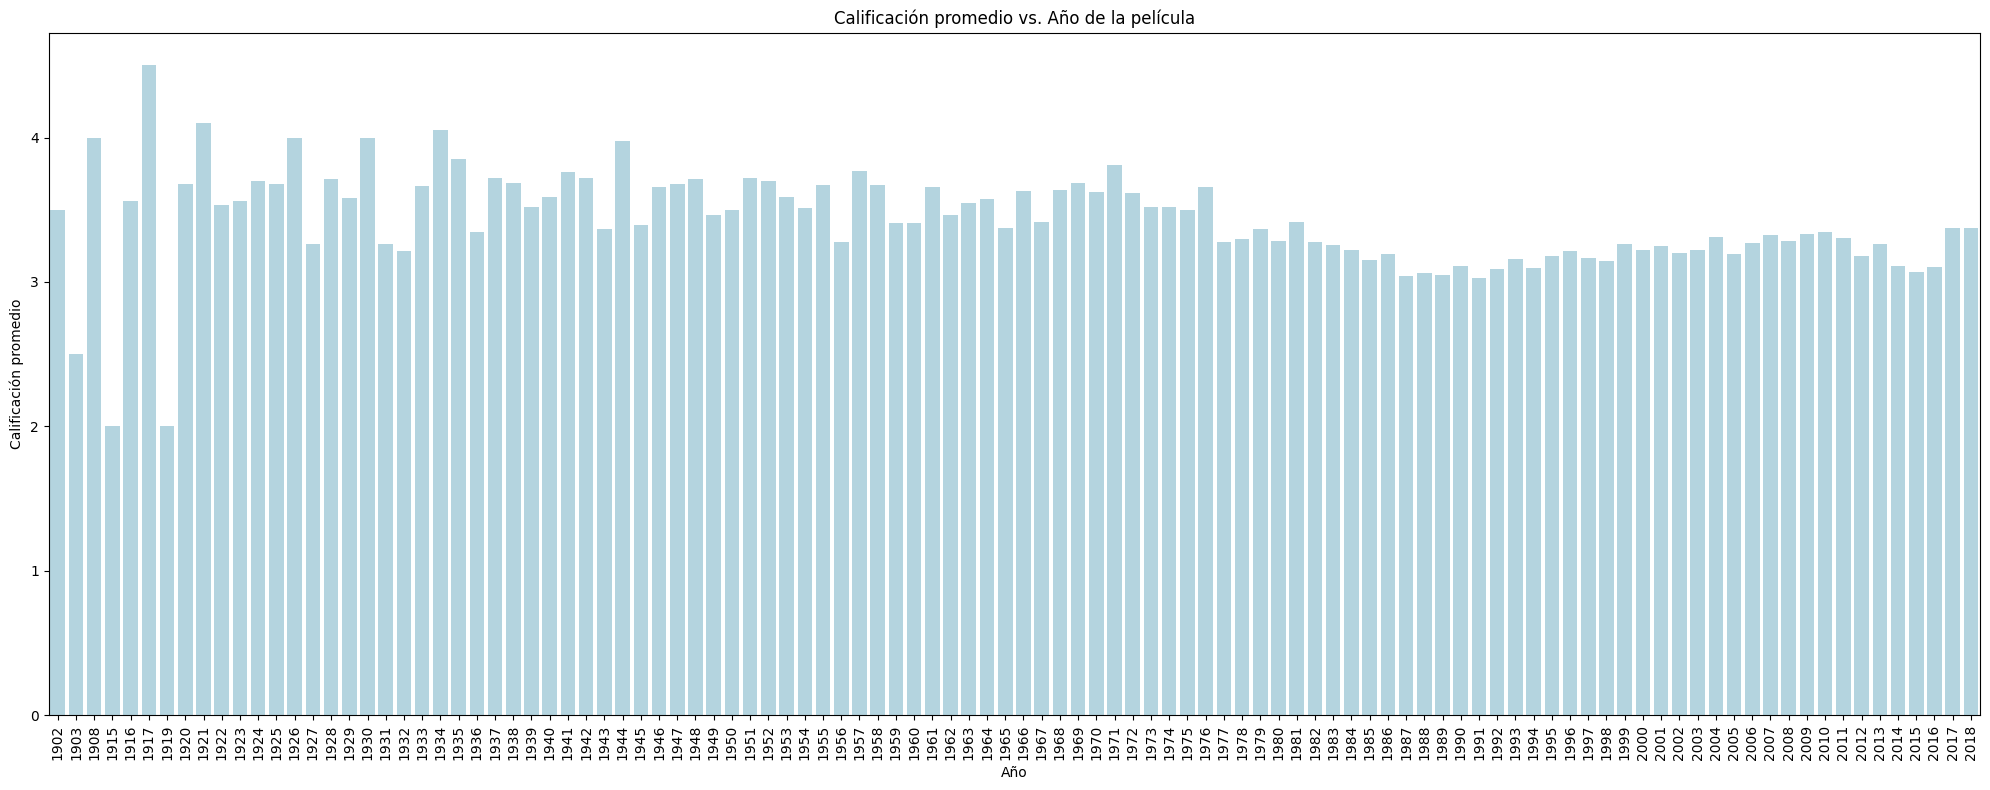

In [12]:
# Extraemos el año de la columna 'title' en 'movies_df'.
# Nuevamente usamos str.extract() con una expresión regular para extraer el año (exactamente cuatro dígitos numéricos)
# que se encuentran dentro del paréntesis en la cadena de texto de la columna title.
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')

# Debemos limpiar los datos.
# Rellenamos los años null con un valor 0 antes de convertirlos a entero (int).
movies_df['year'].fillna(0, inplace=True)
movies_df['year'] = movies_df['year'].astype(int)

# Calculamos la calificación media y el número de calificaciones para cada película.
# Obtenemos la calificación media (mean_rating) y el número total de calificaciones (rating_count), agrupando los datos por movieId.
# Estas estadísticas proporcionan una visión general del recibimiento y la popularidad de cada película.
ratings_summary = ratings_df.groupby('movieId')['rating'].agg(mean_rating='mean', rating_count='count').reset_index()

# Combinamos el DataFrame de películas con el resumen de calificaciones usando merge, basado en movieId.
# Tendremos movies_df con más información detallada sobre las calificaciones promedio y el número de calificaciones por película.
movies_with_ratings = pd.merge(movies_df, ratings_summary, on='movieId', how='left')

# Limpiamos y preparar los datos.
# Convertimos la columna 'year' a numérico y eliminamos filas donde 'year' sea nulo.
# Preparamos el DataFrame para el análisis eliminando filas que podrían haber quedado con valores NaN después del merge
# y asegurando la integridad de los datos.
movies_with_ratings['year'] = pd.to_numeric(movies_with_ratings['year'], errors='coerce')
movies_with_ratings.dropna(subset=['year'], inplace=True)

# Calculamos la calificación promedio para cada año.
# Esto permite analizar cómo ha variado la recepción de las películas a lo largo del tiempo.
# Agrupamos las películas por año y calculamos la calificación promedio para cada año.
# Filtramos los datos para excluir películas con año asignado como 0 antes de calcular la media.
movies_with_ratings = movies_with_ratings[movies_with_ratings['year'] != 0]
yearly_average_rating = movies_with_ratings.groupby('year')['mean_rating'].mean().reset_index()

# Ordenamos los resultados por año de forma ascendente para mejorar la visualización
yearly_average_rating.sort_values(by='year', ascending=True, inplace=True)

# Visualizamos los resultados.
# Creamos un diagrama de barras para mostrar la calificación promedio por año.
plt.figure(figsize=(20, 8))
sns.barplot(x='year', y='mean_rating', data=yearly_average_rating, color='lightblue')

# Configuramos los ejes rotándolos y dándoles un título para claridad.
plt.xticks(rotation=90)
plt.title('Calificación promedio vs. Año de la película')
plt.xlabel('Año')
plt.ylabel('Calificación promedio')

# Ajustamos la disposición para asegurar que no hay elementos recortados en la visualización
plt.tight_layout()
plt.show()

# Comentario de los resultados obtenidos
__Con la gráfica obtenida en este apartado b facilitamos la identificación de tendencias en la calidad de las películas a lo largo del tiempo, los cambios en la calificación promedio pueden correlacionarse con eventos de la industria del cine o cambios en los gustos del público.__

**c) (0,5 puntos)**
Genere un diagrama de dispersión que represente la calificación promedio versus el número de calificaciones. Utilice diferentes colores para representar películas de diferentes décadas.

Sugerencia: use _seaborn.scatterplot para generar el diagrama de dispersión y el parámetro 'hue' para agrupar películas con el mismo color de símbolo.

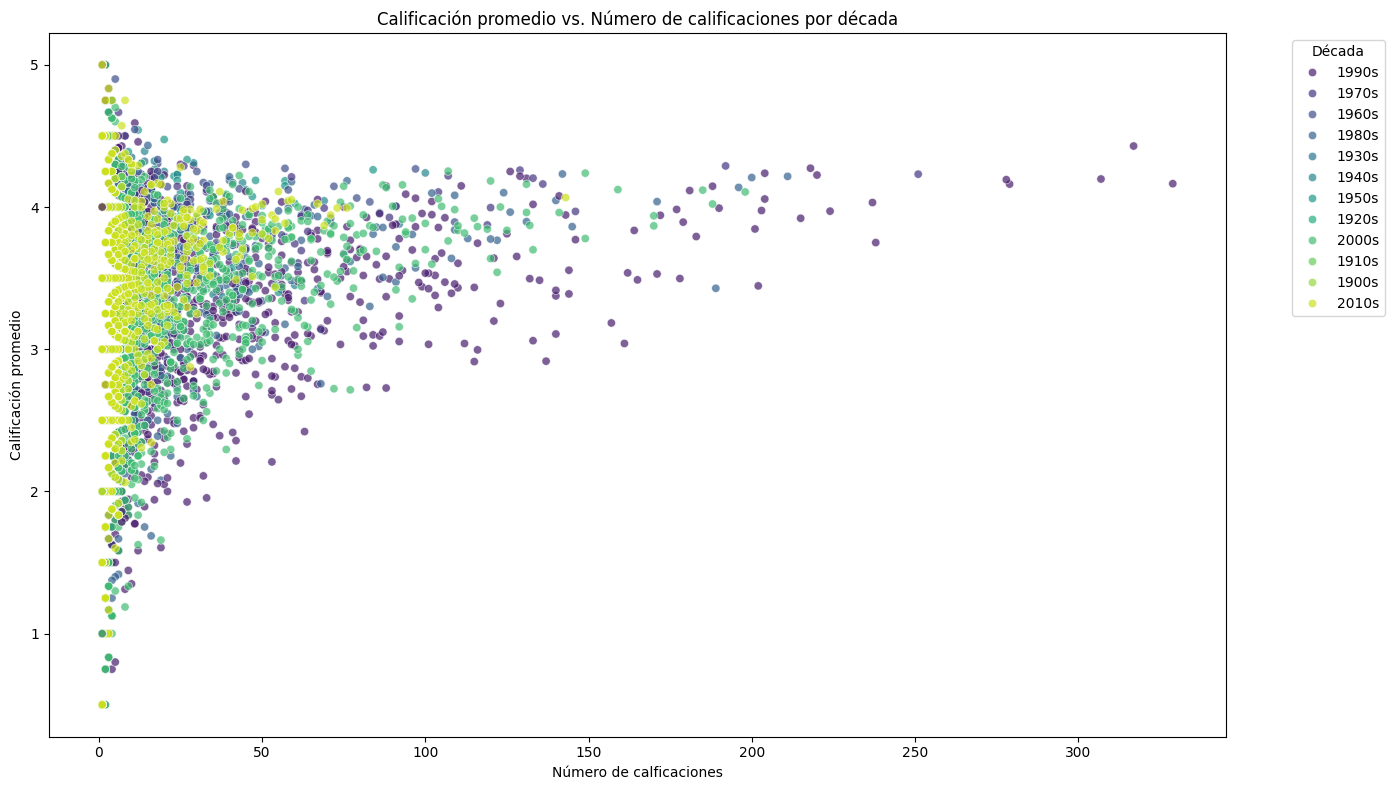

In [13]:
# Clasificamos las películas por décadas.
# Calculamos la década para cada película y crear una nueva columna 'decade'.
# Utilizas la operación de división entera // para obtener el primer año de la década (por ejemplo, 1995 se convierte en 1990)
# y lo convertimos a int para eliminar cualquier decimal, y luego a str para poder añadir la letra 's' al final,
# convirtiendo así los años en etiquetas de décadas (como "1990s").
movies_with_ratings['decade'] = (movies_with_ratings['year'] // 10 * 10).astype(int).astype(str) + 's'

# Limpiamos los datos.
# Eliminamos las filas con valores nulos en las columnas rating_count, mean_rating, y decade.
# Esto es necesario para asegurar que todos los datos que se usen en el gráfico sean completos y válidos.
movies_with_ratings.dropna(subset=['rating_count', 'mean_rating', 'decade'], inplace=True)

# Creamos el diagrama de dispersión.
# Configuramos el tamaño de la figura para que el diagrama sea lo suficientemente grande para ser visualizado claramente.
plt.figure(figsize=(14, 8))

# Usamos seaborn.scatterplot para dibujar el diagrama de dispersión.
# 'x' es el número de calificaciones, 'y' es la calificación promedio, y 'hue' (variable categórica) es la década.
# Esto permite visualizar cómo las calificaciones promedio se comparan con el número de calificaciones,
# con colores que representan diferentes décadas.
# Escogemos la paleta de colores "viridis" y estableces la transparencia (alpha) de los puntos para mejorar la visualización.
sns.scatterplot(x='rating_count', y='mean_rating', hue='decade', data=movies_with_ratings,
                palette='viridis', alpha=0.7)

# Añadimos títulos y etiquetas para mayor claridad.
plt.title('Calificación promedio vs. Número de calificaciones por década')
plt.xlabel('Número de calficaciones')
plt.ylabel('Calificación promedio')

# Movemos la leyenda fuera del gráfico para no bloquear ningún dato.
plt.legend(title='Década', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico.
# Ajustamos automáticamente los parámetros de la subtrama para llenar el área del gráfico.
plt.tight_layout()
plt.show()

# Comentario de los resultados obtenidos

__El gráfico de este apartado c muestra la relación entre el número de calificaciones y la calificación promedio de películas por década. Hay una gran cantidad de películas con pocas calificaciones y variabilidad en las calificaciones promedio. Las películas con muchas calificaciones tienden a calificaciones promedio más consistentes. Sabemos que los colores indican las décadas: la distribución de estos colores revela cómo las percepciones de las películas han cambiado con el tiempo. Las películas de décadas más recientes parecen tener más calificaciones, lo que podría indicar una mayor popularidad. Finalmente, la variabilidad en las calificaciones promedio de películas con pocas calificaciones sugiere que las calificaciones extremas son menos fiables.__

**d) (0.5 points)**

Genere un diagrama de dispersión que represente la calificación promedio, la década y los números de calificacions.

Sugerencia: use _seaborn.pairplot para generar el diagrama de dispersión y el parámetro 'vars' para elegir qué columnas son representadas.

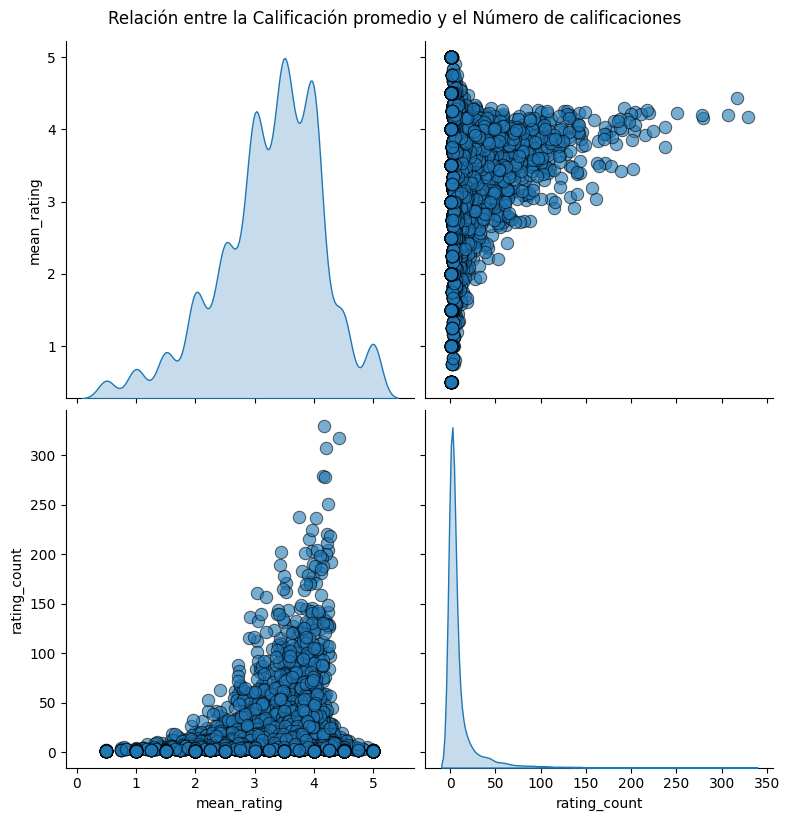

In [14]:
# Utilizaremos seaborn.pairplot para visualizar las relaciones entre 'mean_rating' y 'rating_count'

# Seaborn automáticamente generará una matriz de gráficos para estas variables numéricas

# Configuramos pairplot de este modo:
# - vars: Lista de nombres de columnas en 'movies_with_ratings' que queremos visualizar.
#         En este caso, estamos interesados en 'Calificación promedio' y 'Número de calificaciones'.
# - diag_kind: Especificamos el tipo de gráfico que se muestra en la diagonal de la matriz.
#              'kde' representa la estimación de densidad del kernel, proporcionando una
#              distribución de cada variable.
# - plot_kws: Es un diccionario de argumentos de palabras clave que se pasan a la función de
#             plot utilizada para dibujar los gráficos de dispersión.
# Configuramos la transparencia (alpha), el tamaño del punto (s) y el color del borde (edgecolor).
# - height: Damos tamaño de los gráficos generados.

# Generamos el pairplot.
sns.pairplot(data=movies_with_ratings,
             # Especificamos las columnas para el análisis.
             # 'Calificación promedio' --> mean_rating y 'Número de calificaciones' --> rating_count.
             vars=['mean_rating', 'rating_count'],
             # Usamos KDE para las gráficas diagonales.
             # Configuramos los gráficos diagonales para mostrar la estimación de densidad del kernel (KDE)
             # esto es útil para ver la distribución de una sola variable.
             diag_kind='kde',
             # Dammos estilo de los puntos en el gráfico de dispersión
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
              # Damos tamaño de los gráficos
             height=4)

# Ponemos un título del gráfico.
# Ajustamos el título utilizando plt.suptitle y personalizamos su posición con 'y=1.02'.
# La opción y=1.02 ajusta la posición vertical del título
# nos asegurarmos de que se sitúa por encima de los gráficos individuales.
plt.suptitle('Relación entre la Calificación promedio y el Número de calificaciones', y=1.02)

# Finalmente, mostramos el gráfico.
plt.show()

# Comentario de los resultados obtenidos

__En este apartado d vemos que, el pairplot muestra una tendencia de las películas con más calificaciones a tener calificaciones promedio más altas, y películas con menos calificaciones tienden a mostrar una mayor variabilidad en sus calificaciones promedio. Las distribuciones individuales revelan que la mayoría de las películas tienen pocas calificaciones y que las calificaciones promedio tienden a agruparse alrededor de números enteros. Esto indica un sesgo de popularidad y un sesgo de selección en el comportamiento de calificación de los usuarios.__

**e) (1 punto)** Agrupe los datos 2D (calificación media y número de calificaciones) usando un algoritmo de k-medias con k=2. Representa los resultados de la agrupación indicando la ubicación de los centroides.

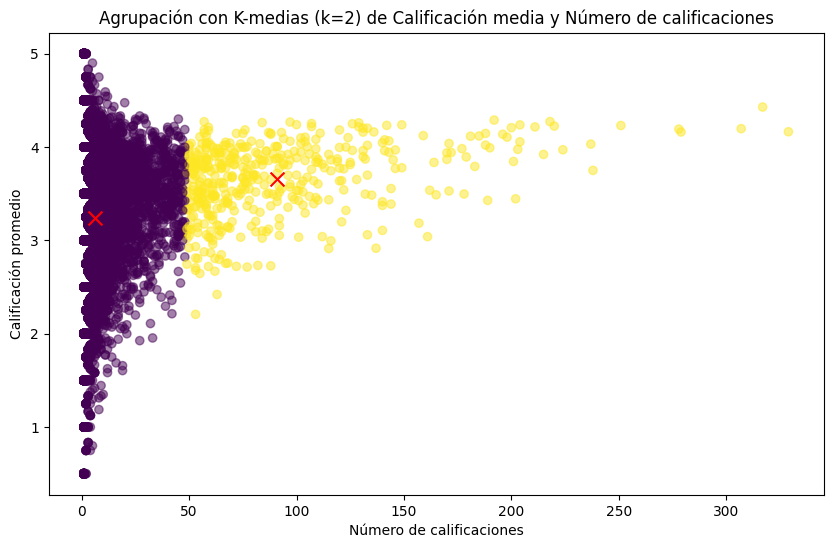

In [15]:
from sklearn.cluster import KMeans

# Preparamos los datos para el clustering.
# Seleccionamos las columnas  y se eliminamos las filas con valores nulos
# para obtener los datos que se utilizarán en el clustering.
X = movies_with_ratings[['mean_rating', 'rating_count']].dropna()

# Aplicar k-medias con k=2, especificando dos clusters (n_clusters=2),
# un estado aleatorio fijo para reproducibilidad (random_state=0),
# y un número de inicializaciones del método (n_init=10)
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)

# Obtenemos las etiquetas de los clusters y los centroides.
# Recuperamos las etiquetas de cluster asignadas a cada punto de datos y las coordenadas de los centroides de cada cluster.
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Representamos los resultados.
# Dibujar los puntos de datos, coloreando por etiqueta de cluster.
# La transparencia se establece con alpha=0.5 y se utiliza el mapa de colores 'viridis'.
plt.figure(figsize=(10, 6))
plt.scatter(X['rating_count'], X['mean_rating'], c=labels, alpha=0.5, cmap='viridis')

# Dibujamos los centroides de los clusters con color rojo,
# un tamaño más grande (s=100) y con una forma de 'x' para distinguirlos de los puntos de datos.
# El orden de las coordenadas se invierte para que coincida con los ejes x e y respectivamente
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=100, marker='x')

# Configuramos los títulos y etiquetas para mejorar la comprensión del gráfico.
plt.title('Agrupación con K-medias (k=2) de Calificación media y Número de calificaciones')
plt.xlabel('Número de calificaciones')
plt.ylabel('Calificación promedio')

# Finalmente, mostramos el gráfico
plt.show()

# Comentario de los resultados obtenidos

__La gráfica de este apartado d,  muestra dos agrupaciones de películas identificadas por el algoritmo K-means. Un grupo muestra menos calificaciones y un promedio de calificaciones variable, mientras que el otro grupo tiene más calificaciones y, en general, calificaciones promedio más altas. Los centroides de cada grupo sugieren tendencias de popularidad y aceptación entre las películas.__

**f) (0,5 puntos)** Repita el agrupamiento de la sección anterior después de escalar los datos (estandarización, use la función StandardScaler de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Comente los resultados. ¿Cuál es el efecto principal de escalar los datos en el resultado de la agrupación?

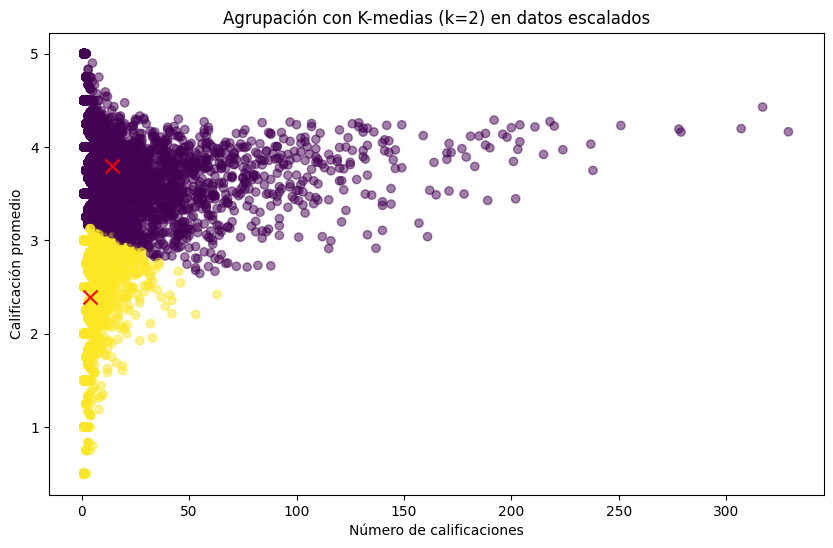

In [16]:
from sklearn.preprocessing import StandardScaler
# Preparamos de los datos.
# Extraemos las columnas de interés y eliminamos filas con valores nulos
X = movies_with_ratings[['mean_rating', 'rating_count']].dropna()

# Estandarización de los datos
# Inicializamos y ajustamos StandardScaler para normalizar las características,
# de modo que tengan una media de 0 y una desviación estándar de 1.
# Esto es importante porque K-Means es sensible a la escala de las variables.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos del algoritmo de k-medias.
# Inicializamos y ajustamos el modelo k-medias con k=2 sobre los datos estandarizados
kmeans_scaled = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_scaled)

# Obtenemos las etiquetas de los clusters.
# Esto indica a qué cluster pertenece cada punto de datos.
# y las coordenadas de los centroides en el espacio de características estandarizado.
labels_scaled = kmeans_scaled.labels_
centroids_scaled = kmeans_scaled.cluster_centers_

# Transformamos los centroides nuevamente al espacio original para interpretación.
# Esto permite interpretar los centroides en términos de las unidades y escala originales.
centroids_scaled_back = scaler.inverse_transform(centroids_scaled)

# Visualizamos los datos en un diagrama de dispersión.
# Coloreamos los puntos según el cluster al que pertenecen y marcando los centroides.
plt.figure(figsize=(10, 6))

# Dibujamos los puntos de datos, coloreando por la etiqueta del cluster.
plt.scatter(X['rating_count'], X['mean_rating'], c=labels_scaled, alpha=0.5, cmap='viridis')

# Los centroides se han transformado nuevamente al espacio original
# para que sean coherentes con las escalas de las características originales.
# Configuramos el tamaño de la figura para mejorar la visualización.
plt.scatter(centroids_scaled_back[:, 1], centroids_scaled_back[:, 0], c='red', s=100, marker='x')

# Añade título y etiquetas a los ejes para proporcionar
# un contexto claro sobre lo que muestra el gráfico.
plt.title('Agrupación con K-medias (k=2) en datos escalados')
plt.xlabel('Número de calificaciones')
plt.ylabel('Calificación promedio')

# Finalmente, mostramos el gráfico
plt.show()

# ¿Cuál es el efecto principal de escalar los datos en el resultado de la agrupación?

Escalar los datos antes de agruparlos cambia la distribución de los grupos, porque cada variable, calificaciones promedio y número de calificaciones, aporta igual al análisis. Esto evita que variables con escalas grandes dominen el resultado, haciéndolo más ajustado. Al usar k-medias, sensible a las escalas, la estandarización es clave. Los centroides de grupos en datos escalados requerieren una reconversión para su interpretación. En definitiva, escalar los datos en el resultado de la agrupación ofrece grupos más homogéneos y claros, mejorando la calidad y entendimiento de la agrupación al tratar todas las variables por igual.

# Comentario de los resultados obtenidos

__La gráfica, ya escalada, de este último ejercicio ratifica (en relación con el apartado f) que,las películas más populares y posiblemente de mayor calidad tienden a recibir mayor número de calificaciones y calificaciones promedio más altas, mientras que las películas menos populares (más polarizadas) reciben menos calificaciones y tienen calificaciones promedio más bajas.__
